<a href="https://colab.research.google.com/github/nathannguyen0127/MANE4962-Machine-Learning-for-Engineering/blob/main/Homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MANE 4962: Machine Learning for Engineering***

**Homework 3**

Nathan Nguyen : RIN 662029534

##Problem 1.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLE Colab


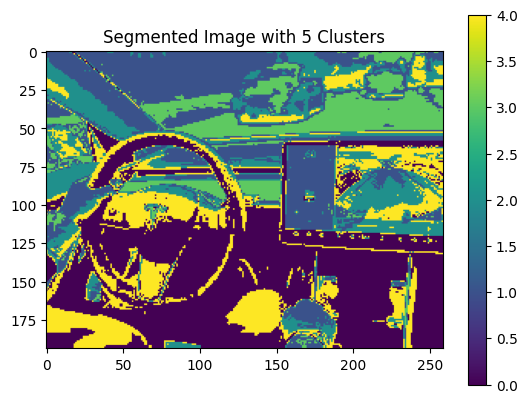

In [2]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/MLE\ Colab/

from skimage.io import imread, imshow
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'seg2.jpg'
image = imread(image_path)
pixels = image.reshape((-1, 3))

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(pixels)

labels = kmeans.labels_
segmented_image = labels.reshape(image.shape[:2])

# Display the segmented image
plt.imshow(segmented_image, cmap='viridis')
plt.colorbar()
plt.title(f'Segmented Image with {n_clusters} Clusters')
plt.show()

##Problem 2.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MLE Colab


<ipython-input-6-a5f1363c2b87>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))


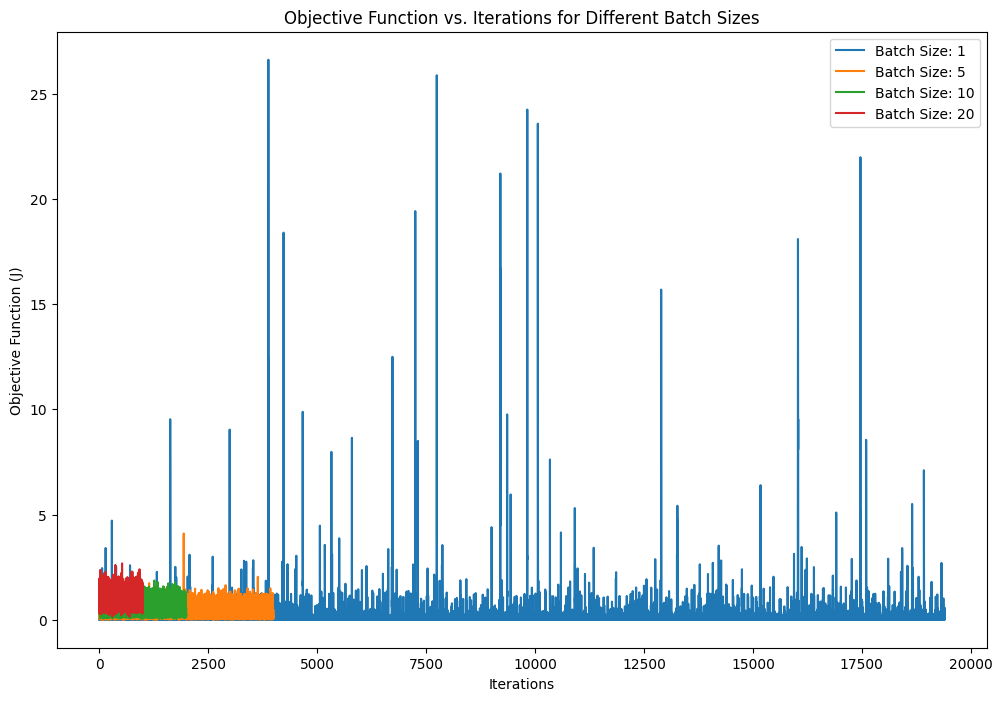

Predicted house price for city population of 160,000: $181205.37


In [6]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/MLE\ Colab/

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

def h(w,X):
    return np.dot(X,w)

def mse(w,X,y):
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

def mini_batch_gradient_descent(X, y, w_start, batch_size, epochs, alpha):
    w = w_start
    J_values = []
    w_store = []

    for _ in range(epochs):
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            batch_size_i = len(y_batch)

            temp_w = w
            J_values.append(mse(w,X_batch,y_batch))
            w_store.append(list(w[:,0]))

            for j in range(len(temp_w)):
                temp_w[j] = w[j] - (alpha/batch_size_i)*np.sum((h(w,X_batch) - y_batch)*np.array(X_batch[:,j]).reshape(batch_size_i,1))
            w = temp_w

    return w, w_store, J_values

def predict(w, xval):
    return w[0] + w[1]*xval

epochs = 200
alpha = 0.01
batch_sizes = [1, 5, 10, 20]
w_start = np.zeros((X.shape[1], 1))

plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
  w, w_store, J_values = mini_batch_gradient_descent(X, y, w_start,batch_size, epochs, alpha)
  plt.plot(range(len(J_values)) ,J_values, label=f'Batch Size: {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function (J)')
plt.title('Objective Function vs. Iterations for Different Batch Sizes')
plt.legend()
plt.show()

population = 160000
X_pred = np.array([1, population]).reshape(1, -1)  # Reshape to (1, 2)
predicted_price = h(w, X_pred)
print(f'Predicted house price for city population of 160,000: ${predicted_price[0][0]:.2f}')

Predicted house price for city population of 160,000: \$181,205.37

When batch size is equal to one, this is essentially stochastic gradient descent. Because the gradient is being calculated per data point sample, there are many more iterations from updates which makes it both computationally more expensive and noisy from how rapidly the gradient changes between samples.

##Problem 3.

Selected Features: ['worst area' 'worst concave points']
Accuracy: 0.9649
Precision: 0.9722
Recall: 0.9722
F1 Score: 0.9722


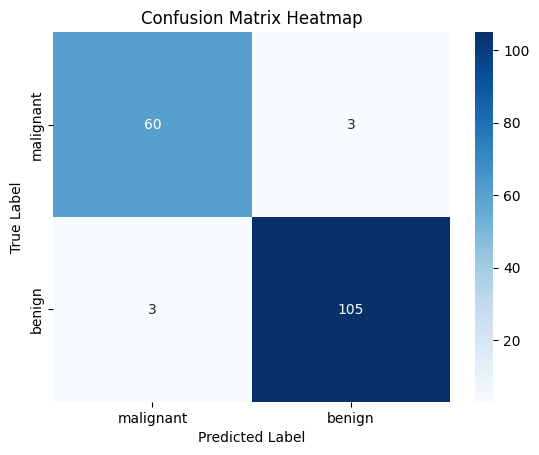

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)

rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)

selected_features = data.feature_names[rfe.support_]

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Selected Features: {selected_features}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##Problem 4.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted house price for city population of 165,000: $218542.59
Mean Squared Error on validation set: 11.24
Mean Absolute Error on validation set: 2.14
Root Mean Squared Error on validation set: 3.35


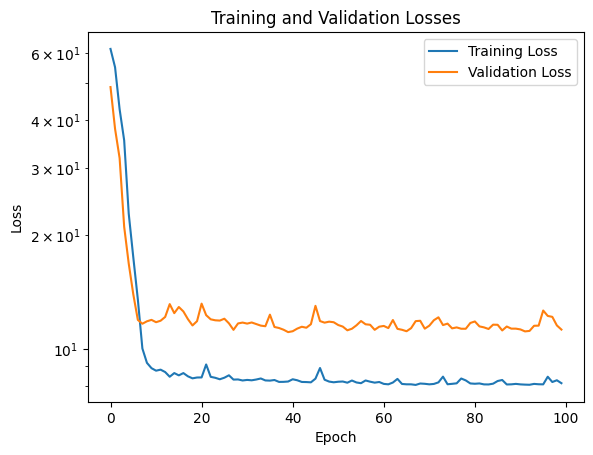

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0, 1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

rmse = RootMeanSquaredError()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.007), loss='mse', metrics=['mae', rmse])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

population = 165000
scaled_population = scaler.transform([[population]])
predicted_price = model.predict(scaled_population)
print(f'Predicted house price for city population of 165,000: ${predicted_price[0][0]:.2f}')

mse , mae, rmse = model.evaluate(X_val, y_val, verbose=0)
print(f'Mean Squared Error on validation set: {mse:.2f}')
print(f'Mean Absolute Error on validation set: {mae:.2f}')
print(f'Root Mean Squared Error on validation set: {rmse:.2f}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w[0],w[1]))

plt.ylabel('y')
plt.xlabel('x')
plt.legend()

Predicted house price for city population of 165,000: \$216092.89

Mean Squared Error on validation set: 11.56

Mean Absolute Error on validation set: 2.18

Root Mean Squared Error on validation set: 3.40

Looking at the plot, the validation and training losses both converge at approximatelty the same iteration time. Yet, the model converges to a much lower error than the validation set, indicating possible overfitting. Even with differing epochs and learning rates, it follow this trend.